In [ ]:
# 0 : 정상
# 1 : 불량

In [ ]:
# 실제 정답
y_true = [0,1,1,1,1,0,1,1,0,0]

In [ ]:
# 임의로 정한 클래스에 대한 확률
A_proba = [0.6,0.7,0.7,0.8,0.9,0.7,0.85,0.7,0.65,0.75]
B_proba = [0.05,0.05,0.1,0.3,0.6,0.3,0.4,0.5,0.2,0.1]
C_proba = [0,1,1,1,1,0,1,1,0,0]

## sklearn.metrics.roc_curve
### [ ROC Curve ]
: threshold를 변화시키면서 fpr, tpr을 plot한 curve로 x축은 fpr, y축은 tpr을 가집니다
##### # parameter
- y_true : (ndarray of shape) True Binary labels
  - 라벨이 {-1,1},{0,1}이 아니면 pos_label에 명시해주어야 함.
- y_score : (ndarray of shape) Target scores
  - positive class와 신뢰값의 확률추정치 혹은 결정의 비임계 측정값일 수 있음
- pos_label : (int or str, default=None) positive class의 라벨
  - pos_label=None일때, y_true가 {-1,1},{0,1}중에 하나면 pos_label은 1로 설정됨(그렇지 않으면 오류 발생)
- sample_weight : (array-like of shape, default=None) Sample weight
- drop_intermediate : (bool, default=True) ROC 곡선에 나타나지 않는 차선책 임계값을 삭제할지 여부
  - 이 기능은 더 가벼운 ROC 곡선을 만드는 데 유용함

##### # returns
- (fpr, tpr, threshold)
  - positive, negative을 확률 혹은 특정 score로 구분하는 경우, fpr, tpr은 threshold의 함수. 즉 fpr, tpr은 threshold에 따라 바뀌는 변수

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_A, tpr_A, thr_A = roc_curve(y_true, A_proba)
fpr_B, tpr_B, thr_B = roc_curve(y_true, B_proba)
fpr_C, tpr_C, thr_C = roc_curve(y_true, C_proba)

In [ ]:
print(fpr_A, tpr_A, thr_A)
print(fpr_B, tpr_B, thr_B)
print(fpr_C, tpr_C, thr_C)

[0.   0.   0.   0.25 0.5  1.  ] [0.         0.16666667 0.5        0.5        1.         1.        ] [1.9  0.9  0.8  0.75 0.7  0.6 ]
[0.   0.   0.   0.25 0.5  1.  ] [0.         0.16666667 0.5        0.66666667 0.66666667 1.        ] [1.6  0.6  0.4  0.3  0.2  0.05]
[0. 0. 1.] [0. 1. 1.] [2 1 0]


In [ ]:
auc_A = auc(fpr_A, tpr_A)
auc_B = auc(fpr_B, tpr_B)
auc_C = auc(fpr_C, tpr_C)

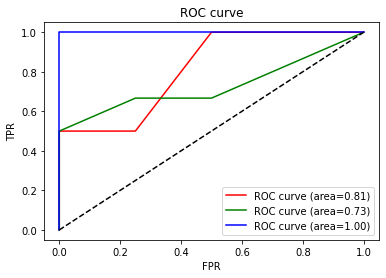

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot(fpr_A, tpr_A, 'r', label='ROC curve (area=%0.2f)'%auc_A)
plt.plot(fpr_B, tpr_B, 'g', label='ROC curve (area=%0.2f)'%auc_B)
plt.plot(fpr_C, tpr_C, 'b', label='ROC curve (area=%0.2f)'%auc_C)
plt.plot([0,1],[0,1], 'k', linestyle='--')
plt.legend(loc='lower right')
plt.show()